# Reading and plotting Digital Elevation Models

In [1]:
%pylab inline
import numpy as np
import pylab as pl
from osgeo import gdal, ogr, osr

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = gdal.Open("../phirad-data/dem/gt30PH.tif")
elevation = ds.ReadAsArray()

In [3]:
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

In [4]:
nrows, ncols = elevation.shape
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows
lons = np.arange(x0,x1,dx)
lats = np.arange(y0,y1,dy)
lon, lat = np.meshgrid(lons,lats)

(4.5666666666808275, 21.57500000000736)

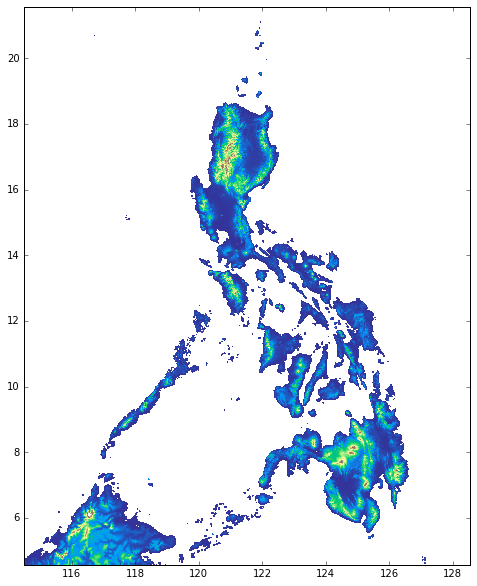

In [5]:
pl.figure(figsize=(8,10))
pl.pcolormesh(lon,lat,np.ma.masked_less(elevation,0), cmap=pl.cm.terrain, vmin=0,vmax=3000)
pl.xlim((x0,x1))
pl.ylim((y1,y0))

(6, 8)

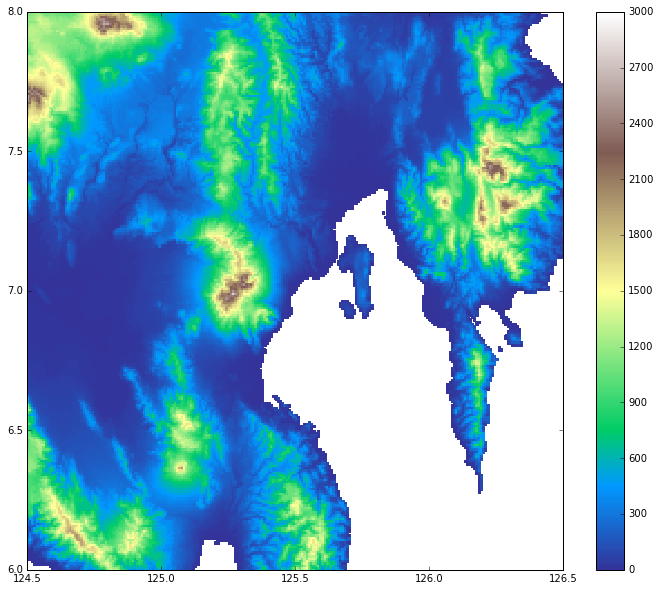

In [6]:
pl.figure(figsize=(12,10))
pm = pl.pcolormesh(lon,lat,np.ma.masked_less(elevation,0), cmap=pl.cm.terrain, vmin=0,vmax=3000)
cb = pl.colorbar(pm)
pl.xlim((124.5,126.5))
pl.ylim((6,8))